In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-03 14:37:14.770701: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 14:37:14.801446: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 14:37:15.279300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################




df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/André - RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')
df_Lagosta_ind = pd.DataFrame(df[['Ano','Lagosta_ind']])

dados = df_Lagosta_ind.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1969,1970,1971,1972,1973,1975,1990,1991,1992,1993,1994,1995,2008,2009,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Lagosta_ind'].values
dados.head()

,Ano,Lagosta_ind
12,1962,0.600250
13,1963,3.084490
14,1964,1.378185
15,1965,6.072205
16,1966,2.204001


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=280, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagosta/pesos pesca ind/.weights.h5', overwrite=True)

Epoch 1/280


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7314
Epoch 2/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7080 
Epoch 3/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0814 
Epoch 4/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6917 
Epoch 5/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0160 
Epoch 6/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6761 
Epoch 7/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6443 
Epoch 8/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6817 
Epoch 9/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0452 
Epoch 10/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6625 
Epoch 11/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9993 
Epoch 12/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6913 
Epoch 13/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6957 
Epoch 14/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0408 
Epoch 15/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0454 
Epoch 16/280
2/2 ━━━━━━━━━━━━━━━

In [9]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagosta/pesos pesca ind/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[24.006079 ]
 [28.882607 ]
 [33.75916  ]
 [38.635696 ]
 [43.512222 ]
 [54.016922 ]
 [ 2.5100446]
 [ 2.725069 ]
 [ 2.890141 ]
 [ 2.9252205]
 [ 2.9859762]
 [ 3.0656395]
 [ 5.575182 ]
 [ 5.637446 ]
 [ 5.9258986]]


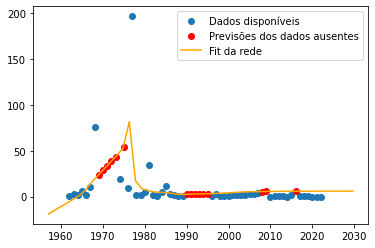

In [5]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

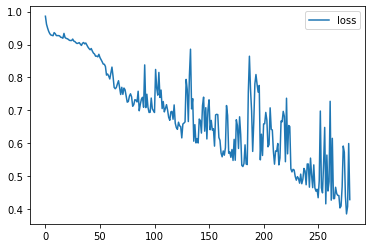

In [6]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [7]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Lagosta_ind':prev_ausentes.flatten()})


df_previsoes.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagosta/Interpolação Lagosta_ind.xlsx')

df_previsoes

,Ano,Lagosta_ind
0,1969,24.006079
1,1970,28.882607
2,1971,33.759159
3,1972,38.635696
4,1973,43.512222
5,1975,54.016922
6,1990,2.510045
7,1991,2.725069
8,1992,2.890141
9,1993,2.925220
